# Problem 2


In [78]:
%pylab nbagg


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## P2.1

Note that functions.py is contained within the directory Assignment.1

## P2.1

In [79]:
import functions as f

In [80]:
#creating string to be written to gaus_in.out. Note that all lines will be ouput collectively at the end of the notebook.
g1 = f.gauss(1)
lin_1 = "The gaussian function at x = 1 with a,b,c being defaults is %.3f. \n" %f.gauss(1)


## P2.2

<IPython.core.display.Javascript object>


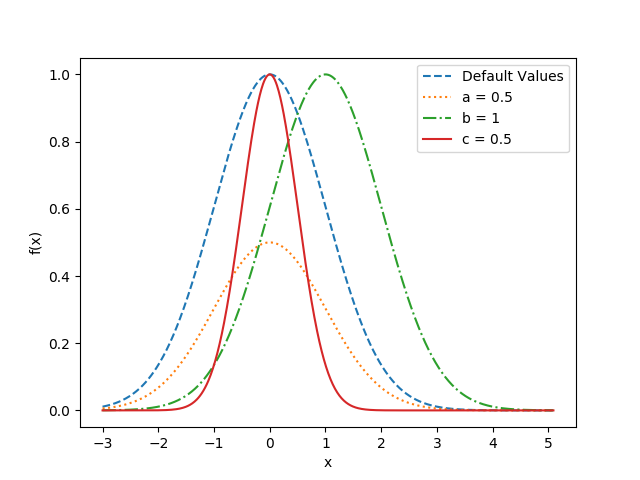

In [81]:
#creating x values for y to be plotted against
x_rng = arange(-3, 5.1, 0.01)

#y values for the default gauss function
g_default = [f.gauss(i) for i in x_rng ]

#y values the gaussian for a = 0.5
g_a =  [f.gauss(i, a=0.5) for i in x_rng ]

#y_values the gaussian for b = 1
g_b = [f.gauss(i, b = 1) for i in x_rng ]

#y_values the gaussian for c = 0.5
g_c =  [f.gauss(i, c=0.5) for i in x_rng ]

fig_1 = plot(x_rng, g_default, '--', label= 'Default Values')
plot(x_rng, g_a, ':', label = "a = 0.5",)
plot(x_rng, g_b, '-.', label ="b = 1")
plot(x_rng, g_c, label ="c = 0.5")
legend()



ylabel('f(x)')
xlabel('x')



The red line shows the gaussian fuction with all constants at their default values.

The blue line shows the gaussian function with a = 0.5. So, a change in 'c' must result in a horizontal stretch of the graph.

The orange line shows the gaussian function with a = 0.5 .So, a change in 'a' must result in a vertical stretch of the graph. 

The green line shows the gaussian function with b = 1. So, a change in 'b' must result in a horizontal shift of the graph.

## P2.3

In [82]:
import integrate as igt
import scipy.interpolate
from scipy.optimize import curve_fit

In [83]:
#string for integration for x_b =  3
num = igt.sym_gauss_int_sqr(3)
lin_2 = "The square root of pi: %.3f \n" %num


In [92]:
#finding n, where n is the number of grid cells, s.t. the error is smaller than or equal to 0.1% (0.001)

#funtion that takes in a known and experimental value and returns the ratio of their difference and the known value.
def error (obtained, known):
    return abs((known-obtained)/known)

#various values for n. note that n can only be an integer.
n_rng = arange(1, 10)

#a list of the errors for each n.
errors = [error(igt.sym_gauss_int_sqr(3, i), pi**(1/2)) for i in n_rng]

#now, we iterate the list until we find an error that is smaller than or equal to 0.001
i=0
while errors[i] >= 0.001:
    i += 1

#prints the n value that corresponds to the first error smaller than or equal to 0.001
lin_3 = "The precision is better than 1.0e-03 for n >= %i \n" %n_rng[i]







For clarity, we plot n versus the error of our calculation.

<IPython.core.display.Javascript object>


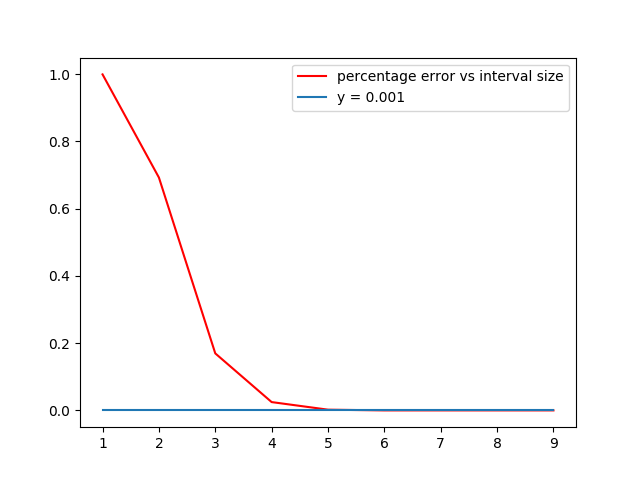

In [93]:
figure()
plot(n_rng, errors, '-r', label = "percentage error vs interval size")
plot(n_rng, [0.001 for i in n_rng], label = "y = 0.001")
legend()

Now, we know that the square of the area if integrated at \[-inf, inf\] gives pi. 


In [95]:
#function that inputs an experimental value and checks it against pi. Returns their ratio.
def check_pi(obtained):
    return obtained**2/pi

#we note that we will not be able to obtaine the EXACT value for x_b_min. so, we make sufficiently enough data points to ensure x_b_min is accurate to 3 significant digits. 
x_rng = arange(1,3 , .1)


#list of the calculated integral for each x_b
areas = [igt.sym_gauss_int_sqr(i,6) for i in x_rng]
new_areas = array(areas)**2

#list of the ratio between our calculated value and pi.
a_ratio = [check_pi(areas[i]) for i in range(len(areas))]
i=1
while a_ratio[i] <= 0.99:
    i +=1

x_min = areas[i]


lin_4 = "Interval boundary >= %.3f for > 99 percent of the Square of the indefinite intgral included. \n" %x_min




for clarity, we plot the ratio of our calculated value wrt x_b and the constant function, 0.99=y

<IPython.core.display.Javascript object>


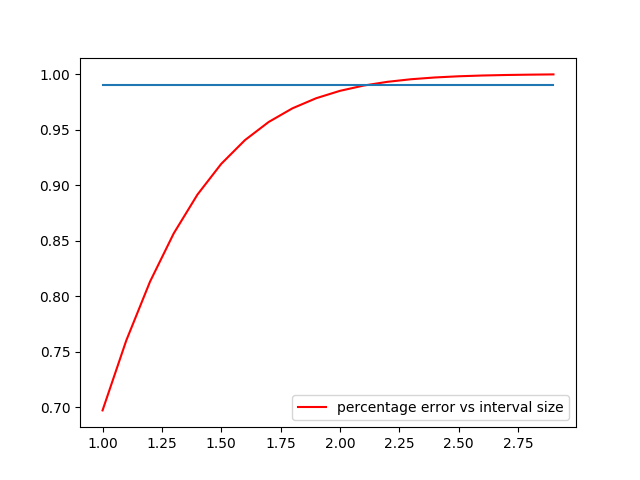

In [96]:
figure()
plot(x_rng, a_ratio, '-r', label = "percentage error vs interval size")
plot(x_rng, [0.99 for i in x_rng])
legend()



## P 2.4

In [97]:
#we create x and y values for z to be calculated with. 
n = 50
x=linspace(-1.,1.2,n)
y=linspace(-1.,1.5,n)

#we put these values into 2d arrays.
xv, yv = meshgrid(x,y)

#here we define the two dimensional gaussian function.
z=f.gauss(xv, c=sqrt(1/2))*f.gauss(yv, c=sqrt(1/2))

<IPython.core.display.Javascript object>


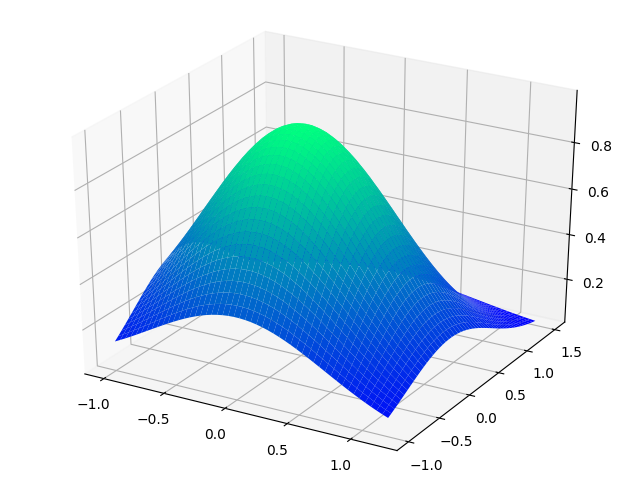

In [98]:
#plotting the 3d surface plot ...
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
ax.plot_surface(xv, yv, z, rstride=1, cstride=1, cmap = cm.winter)


<IPython.core.display.Javascript object>


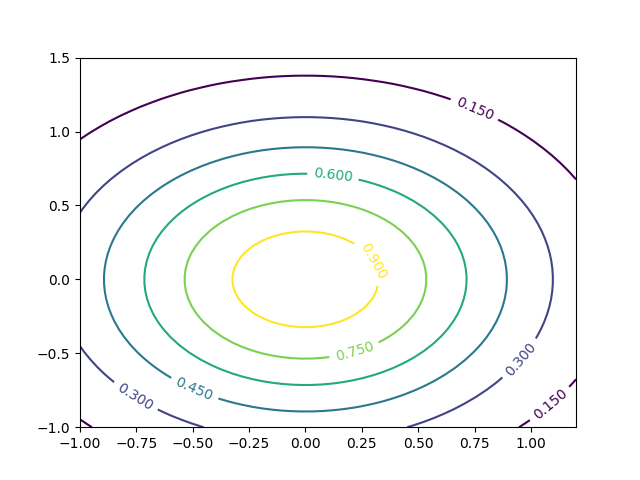

<a list of 8 text.Text objects>

In [99]:
#plotting the contour plot with labels. 
figure()
CS = plt.contour(xv,yv,z)
clabel(CS, inline=1, fontsize=10)

In [100]:
#writing all output to gaus_int.out
file = open('gaus_int.out', 'w')
file.write(lin_1)
file.write(lin_2)
file.write(lin_3)
file.write(lin_4)
file.close()

